# PROJECT 
# HOUSING - PRICES LONDON
# DECISION TREE , RANDOM FOREST AND SUPPORT VECTOR MACHINE CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/H/Downloads/housing-in-london/housing_in_london_monthly_variables.csv")

In [3]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [5]:
df.isna().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [6]:
hmean = df.houses_sold.mean()
nmean = df.no_of_crimes.mean()

In [7]:
df.houses_sold = df.houses_sold.fillna(hmean) 

In [8]:
df.no_of_crimes = df.no_of_crimes.fillna(nmean)

In [9]:
df.isna().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
borough_flag     0
dtype: int64

In [10]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063,1
1,1995-02-01,city of london,82203,E09000001,7.0,2158.352063,1
2,1995-03-01,city of london,79121,E09000001,14.0,2158.352063,1
3,1995-04-01,city of london,77101,E09000001,7.0,2158.352063,1
4,1995-05-01,city of london,84409,E09000001,10.0,2158.352063,1


In [11]:
df = df.drop(columns = ['date','area','code'])

In [12]:
df.head()

,average_price,houses_sold,no_of_crimes,borough_flag
0,91449,17.0,2158.352063,1
1,82203,7.0,2158.352063,1
2,79121,14.0,2158.352063,1
3,77101,7.0,2158.352063,1
4,84409,10.0,2158.352063,1


In [13]:
x = df.drop(columns = 'borough_flag')
y = df['borough_flag']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3,random_state = 100,stratify = y)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9484, 3)
(4065, 3)
(9484,)
(4065,)


In [15]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=121,max_depth=10)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=121, splitter='best')

In [18]:
dtree.score(x_train,y_train)

0.9998945592576972

In [19]:
dtree.score(x_test,y_test)

1.0

In [20]:
predictions = dtree.predict(x_test)

In [21]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1084
           1       1.00      1.00      1.00      2981

    accuracy                           1.00      4065
   macro avg       1.00      1.00      1.00      4065
weighted avg       1.00      1.00      1.00      4065



In [23]:
conf_mat = confusion_matrix(y_test,predictions)
print(conf_mat)

[[1084    0]
 [   0 2981]]


In [24]:
accuracy = accuracy_score(y_test,predictions)
accuracy

1.0

[Text(167.4, 205.35999999999999, 'X[1] <= -0.232\ngini = 0.391\nsamples = 9484\nvalue = [2529, 6955]'),
 Text(111.60000000000001, 181.2, 'gini = 0.0\nsamples = 6905\nvalue = [0, 6905]'),
 Text(223.20000000000002, 181.2, 'X[2] <= 0.031\ngini = 0.038\nsamples = 2579\nvalue = [2529, 50]'),
 Text(167.4, 157.04, 'X[2] <= -0.017\ngini = 0.019\nsamples = 2554\nvalue = [2529, 25]'),
 Text(111.60000000000001, 132.88, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(223.20000000000002, 132.88, 'X[0] <= 2.185\ngini = 0.002\nsamples = 2532\nvalue = [2529, 3]'),
 Text(167.4, 108.72, 'X[1] <= 0.003\ngini = 0.002\nsamples = 2531\nvalue = [2529, 2]'),
 Text(111.60000000000001, 84.56, 'X[1] <= 0.002\ngini = 0.013\nsamples = 313\nvalue = [311, 2]'),
 Text(55.800000000000004, 60.400000000000006, 'gini = 0.0\nsamples = 290\nvalue = [290, 0]'),
 Text(167.4, 60.400000000000006, 'X[0] <= -0.856\ngini = 0.159\nsamples = 23\nvalue = [21, 2]'),
 Text(111.60000000000001, 36.24000000000001, 'X[0] <= -1.008\ngi

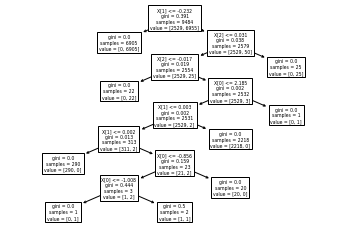

In [25]:
from sklearn import tree
tree.plot_tree(dtree.fit(x_train,y_train))

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfor = RandomForestClassifier(n_estimators=500).fit(x_train,y_train)

In [27]:
rfor.score(x_train,y_train)

0.9998945592576972

In [28]:
rfor.score(x_test,y_test)

1.0

In [29]:
predictions = rfor.predict(x_test)

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1084
           1       1.00      1.00      1.00      2981

    accuracy                           1.00      4065
   macro avg       1.00      1.00      1.00      4065
weighted avg       1.00      1.00      1.00      4065



In [31]:
con_mat = confusion_matrix(y_test,predictions)
print(con_mat)

[[1084    0]
 [   0 2981]]


In [32]:
accuracy = accuracy_score(y_test,predictions)
accuracy

1.0

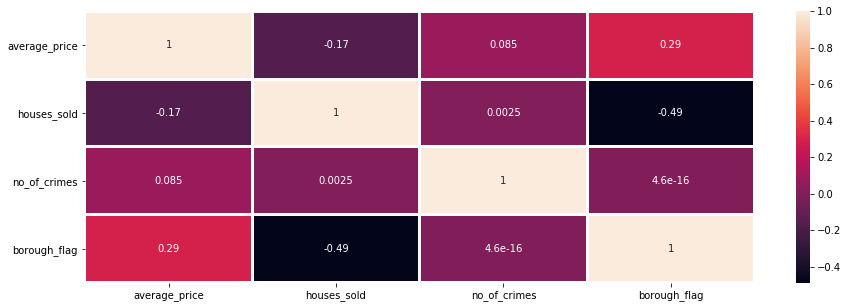

In [33]:
corr = df.corr()
plt.figure(figsize = (15,5))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, linewidths=2, annot=True)

In [34]:
from sklearn.svm import SVC

In [35]:
a = SVC(kernel='rbf',random_state=121,gamma=10,C=1,degree=4)

In [36]:
a.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=121, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
a.score(x_train,y_train)

0.9986292703500632

In [38]:
a.score(x_test,y_test)

0.9990159901599016

In [39]:
predictions = a.predict(x_test)

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1084
           1       1.00      1.00      1.00      2981

    accuracy                           1.00      4065
   macro avg       1.00      1.00      1.00      4065
weighted avg       1.00      1.00      1.00      4065



In [41]:
conf = confusion_matrix(y_test,predictions)

In [42]:
print(conf)

[[1084    0]
 [   4 2977]]


In [43]:
accuracy_svm = accuracy_score(y_test,predictions)

In [75]:
import pickle

In [76]:
file = open("Tree",'wb')

In [77]:
pickle.dump(dtree,file)

In [78]:
file.close()

In [79]:
file = open("Randomforest",'wb')

In [80]:
pickle.dump(rfor,file)

In [81]:
file.close()

In [82]:
file = open("SVC",'wb')

In [83]:
pickle.dump(a,file)

In [84]:
file.close()

In [85]:
fileimp = open("Tree",'rb')

In [86]:
Dectree = pickle.load(fileimp)

In [88]:
fileimp.close()

In [90]:
pred = Dectree.predict(x_test)

In [92]:
Dectree.score(x_test,y_test)

1.0

In [93]:
fileimp = open("Randomforest",'rb')
rforest = pickle.load(fileimp)
fileimp.close()

In [94]:
rforest.score(x_test,y_test)

1.0

In [96]:
fileimp = open("SVC",'rb')
svcfier = pickle.load(fileimp)
fileimp.close()

In [97]:
svcfier.score(x_test,y_test)

0.9990159901599016